Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Load the dataset

In [5]:
heart_df = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(heart_df)

In [7]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Basic information

In [10]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
             

Data cleaning steps by dropping missing values

In [13]:
# Check for null values
print(data.isnull().sum())

# Droping the nulll values if any
data.dropna(axis=0)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Evaluate Correlation Matrix

In [16]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.

Plot the heatmap for correlation

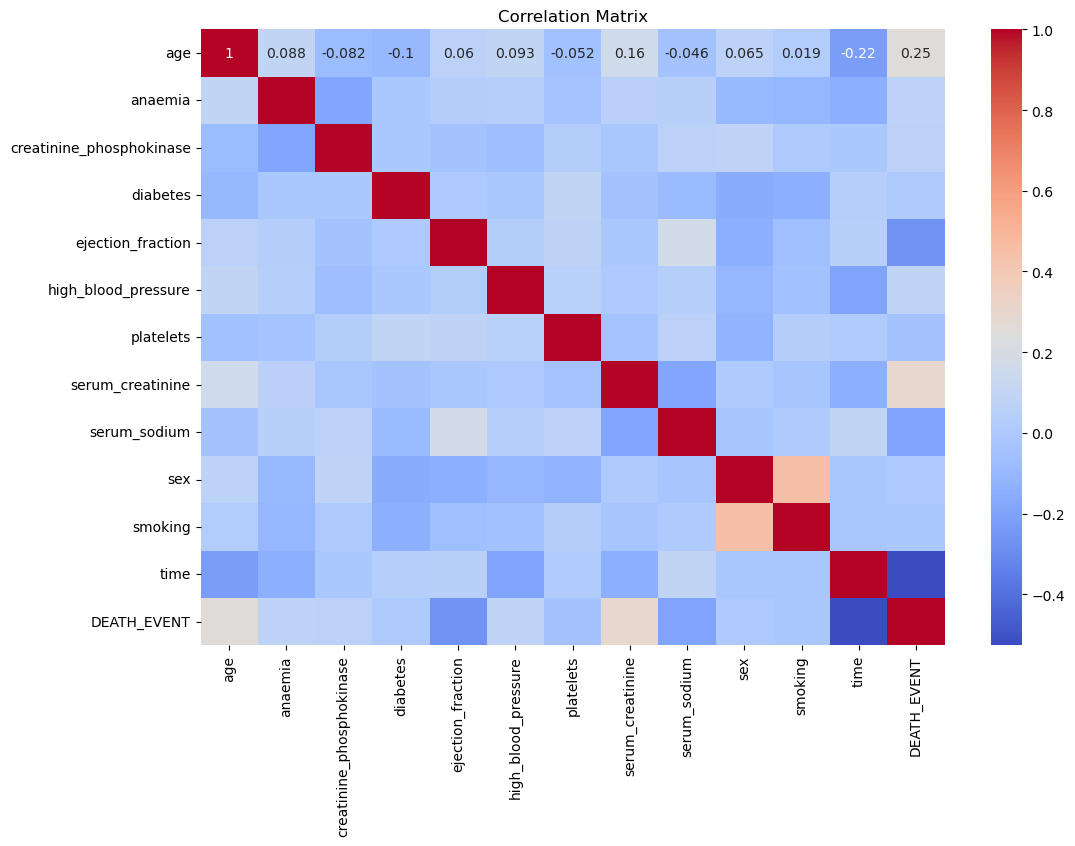

In [19]:
# Generate Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Select features based on correlation matrix

In [22]:
# Example threshold for high correlation: 0.8
threshold = 0.8
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
selected_features = data.drop(columns=to_drop + ['DEATH_EVENT']).columns
print(f"Selected features based on correlation matrix (threshold = {threshold}): {selected_features}")

Selected features based on correlation matrix (threshold = 0.8): Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')


Prepare features and target

In [25]:
X = data[selected_features]
y = data['DEATH_EVENT']

Split the data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
print(X_train)

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
6    75.000        1                       246         0                 15   
183  75.000        0                        99         0                 38   
185  60.667        1                       104         1                 30   
146  52.000        0                       132         0                 30   
30   94.000        0                       582         1                 38   
..      ...      ...                       ...       ...                ...   
188  60.667        1                       151         1                 40   
71   58.000        0                       582         1                 35   
106  55.000        0                       748         0                 45   
270  44.000        0                       582         1                 30   
102  80.000        0                       898         0                 25   

     high_blood_pressure  platelets  serum_creatini

In [32]:
print(y_train)

6      1
183    1
185    1
146    0
30     1
      ..
188    0
71     0
106    0
270    0
102    0
Name: DEATH_EVENT, Length: 239, dtype: int64


In [36]:
print(X_test)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
281  70.0        0                       582         0                 40   
265  50.0        1                       298         0                 35   
164  45.0        0                      2442         1                 30   
9    80.0        1                       123         0                 35   
77   42.0        0                       102         1                 40   
278  50.0        1                      1051         1                 30   
93   60.0        1                       154         0                 25   
109  45.0        0                       292         1                 35   
5    90.0        1                        47         0                 40   
173  50.0        1                       115         0                 20   
97   70.0        1                        59         0                 60   
195  77.0        1                       418         0                 45   

In [38]:
print(y_test)

281    0
265    0
164    1
9      1
77     0
278    0
93     1
109    0
5      1
173    0
97     0
195    1
184    1
154    0
57     0
60     1
147    0
108    0
63     1
140    1
155    0
104    0
247    0
46     1
42     1
275    0
280    0
116    0
213    1
236    0
17     1
239    0
33     0
24     1
45     1
7      1
113    1
194    1
111    0
92     0
75     1
82     1
118    0
76     0
129    0
197    0
210    0
288    0
219    0
178    0
144    1
186    1
84     1
248    0
277    0
73     0
244    0
25     1
209    0
59     1
Name: DEATH_EVENT, dtype: int64


In [40]:
print(X_train_scaled)

[[ 1.16420244  1.13933179 -0.35037003 ...  0.74293206 -0.67625223
  -1.56416577]
 [ 1.16420244 -0.87770745 -0.50593309 ...  0.74293206 -0.67625223
   0.37989712]
 [-0.03281933  1.13933179 -0.50064183 ...  0.74293206 -0.67625223
   0.4950061 ]
 ...
 [-0.50609935 -0.87770745  0.18087256 ...  0.74293206 -0.67625223
  -0.56655455]
 [-1.42476533 -0.87770745  0.0052027  ...  0.74293206  1.4787382
   1.42866789]
 [ 1.58177789 -0.87770745  0.33961039 ...  0.74293206  1.4787382
  -0.57934444]]


In [42]:
print(X_test_scaled)

[[ 7.46626996e-01 -8.77707451e-01  5.20270419e-03 -8.26497787e-01
   1.49345268e-01 -7.36162675e-01 -2.24743345e+00  1.32203359e+00
  -9.44310219e-02  7.42932064e-01  1.47873820e+00  1.50540721e+00]
 [-9.23674793e-01  1.13933179e+00 -2.95340912e-01 -8.26497787e-01
  -2.80697130e-01 -7.36162675e-01  1.05843720e+00 -4.90853221e-01
   8.08329548e-01  7.42932064e-01  1.47873820e+00  1.37750834e+00]
 [-1.34125024e+00 -8.77707451e-01  1.97355174e+00  1.20992460e+00
  -7.10739527e-01 -7.36162675e-01  7.60802546e-01 -2.89421353e-01
   5.82639405e-01  7.42932064e-01 -6.76252226e-01 -4.21691686e-02]
 [ 1.58177789e+00  1.13933179e+00 -4.80535042e-01 -8.26497787e-01
  -2.80697130e-01  1.35839541e+00  1.33481224e+00  8.07000115e+00
  -7.71501449e-01  7.42932064e-01  1.47873820e+00 -1.56416577e+00]
 [-1.59179551e+00 -8.77707451e-01 -5.02758338e-01  1.20992460e+00
   1.49345268e-01 -7.36162675e-01 -2.70288943e-01 -1.88705419e-01
   8.08329548e-01  7.42932064e-01 -6.76252226e-01 -7.45612977e-01]
 [-9.

Initialize models

In [45]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting Machine": GradientBoostingClassifier(random_state=42)
}

Train and evaluate models


Model: Logistic Regression
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60

Confusion Matrix:
 [[34  1]
 [11 14]]


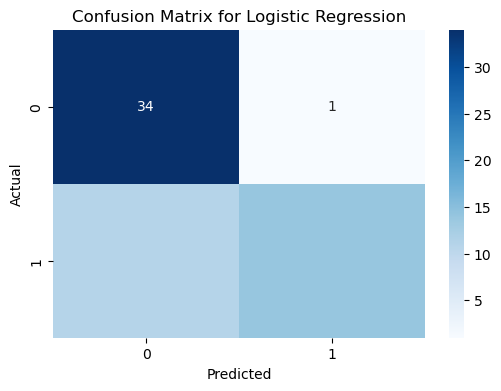


Model: Support Vector Machine
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60

Confusion Matrix:
 [[33  2]
 [10 15]]


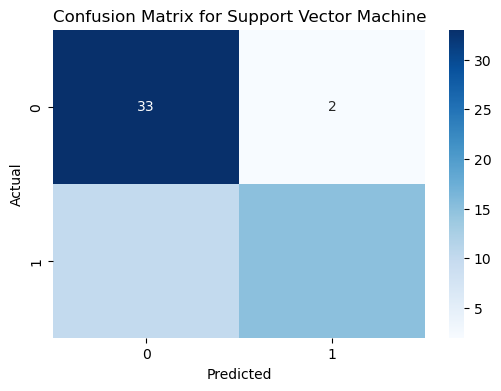


Model: K-Nearest Neighbors
Accuracy: 0.6833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78        35
           1       0.88      0.28      0.42        25

    accuracy                           0.68        60
   macro avg       0.76      0.63      0.60        60
weighted avg       0.75      0.68      0.63        60

Confusion Matrix:
 [[34  1]
 [18  7]]


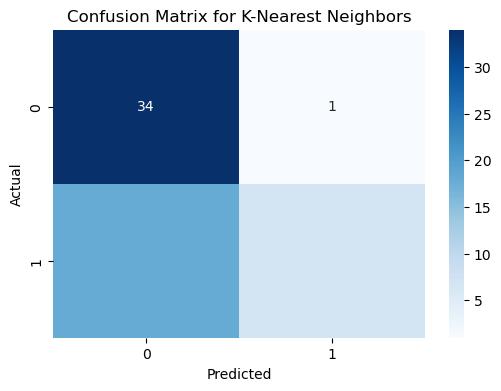


Model: Gradient Boosting Machine
Accuracy: 0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79        35
           1       0.76      0.52      0.62        25

    accuracy                           0.73        60
   macro avg       0.74      0.70      0.71        60
weighted avg       0.74      0.73      0.72        60

Confusion Matrix:
 [[31  4]
 [12 13]]


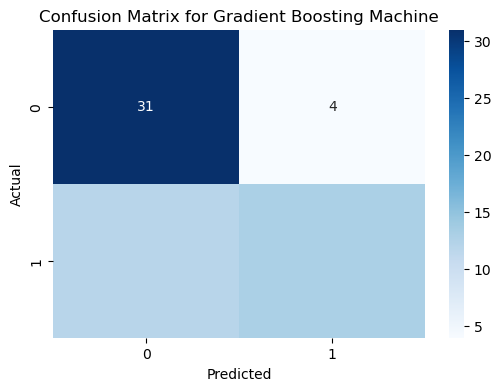

In [48]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    
    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Classification report
    class_report = classification_report(y_test, y_pred)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)
    
    # Plot confusion matrix heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Comparison of classification reports

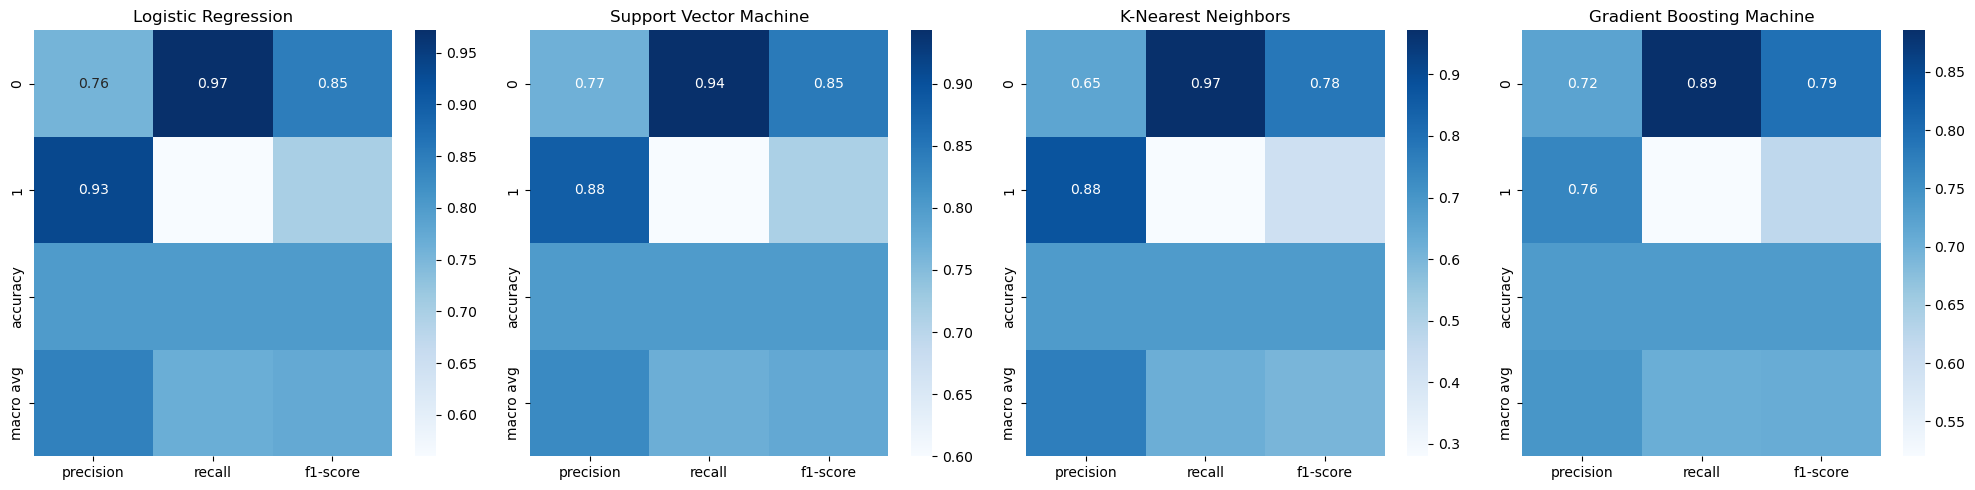

In [51]:
def plot_classification_report(ax, report, title):
    report_df = pd.DataFrame(report).transpose()
    sns.heatmap(report_df.iloc[:-1, :-1].astype(float), annot=True, cmap='Blues', fmt=".2f", ax=ax)
    ax.set_title(title)

# Initialize a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
algorithms = ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Gradient Boosting Machine']
for i, (model_name, model) in enumerate(models.items()):
    # Predictions
    y_pred = model.predict(X_test_scaled)
    
    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Plot classification report
    plot_classification_report(axes[i], report, title=model_name)

# Adjusting layout
plt.tight_layout()
plt.show()

Printing accuracy for each algorithm

In [54]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)
logistic_accuracy = logistic_model.score(X_test_scaled, y_test)
print("logistic_accuracy:",logistic_accuracy)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_accuracy = svm_model.score(X_test_scaled, y_test)
print("svm_accuracy:",logistic_accuracy)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_accuracy = knn_model.score(X_test_scaled, y_test)
print("knn_accuracy:",logistic_accuracy)

gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_scaled, y_train)
gbm_accuracy = gbm_model.score(X_test_scaled, y_test)
print("gbm_accuracy:",logistic_accuracy)

logistic_accuracy: 0.8
svm_accuracy: 0.8
knn_accuracy: 0.8
gbm_accuracy: 0.8


Store the accuracy scores in a dictionary

In [57]:
accuracy_scores = {
    "Logistic Regression": logistic_accuracy,
    "Support Vector Machine": svm_accuracy,
    "K-Nearest Neighbors": knn_accuracy,
    "Gradient Boosting Machine": gbm_accuracy
}

Plot the accuracy scores

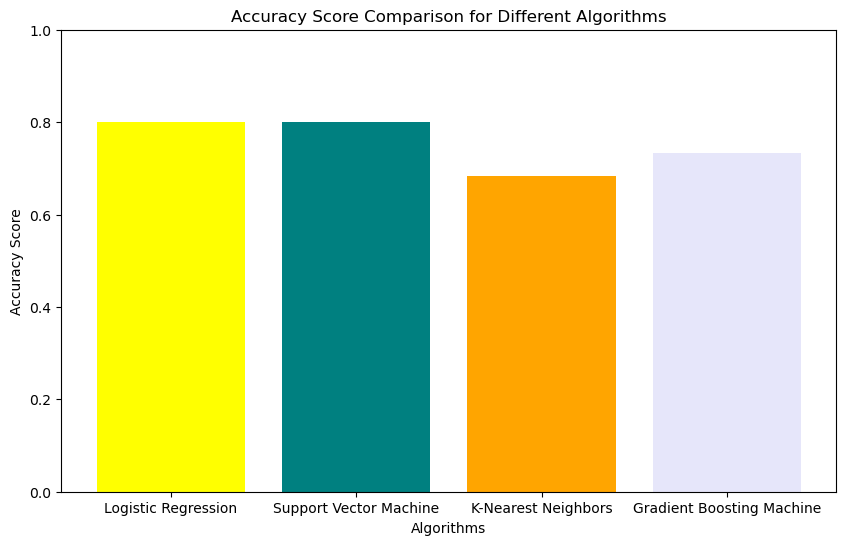

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['yellow', 'teal', 'orange', 'lavender'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison for Different Algorithms')
plt.ylim(0, 1)  # Assuming accuracy scores range between 0 and 1
plt.show()